# Лабораторная работа №3

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка и первичный анализ данных

In [36]:
data = pd.read_csv('Video_Game_Sales_as_of_Jan_2017.csv')

In [37]:
data.shape

(17416, 15)

In [38]:
# типы колонок
data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Rating              object
dtype: object

In [39]:
# типы колонок
data.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
5,Tetris,G,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65.0,8.5,433.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.48,6.95,4.70,2.25,28.38,87.0,80.0,8.4,595.0,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN


## Обработкa пропусков в данных

In [40]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Name                  0
Platform              0
Year_of_Release       8
Genre                 0
Publisher             1
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       9080
Critic_Count       9080
User_Score         9618
User_Count         9618
Rating             7164
dtype: int64

In [41]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 17416


Самое простое - удалить столбцы или строки, где встрчаются пропущенные значения

In [42]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((17416, 15), (17416, 8))

Удалим столбец с годом выпуска

In [43]:
del data['Year_of_Release']

In [44]:
data_new_2=data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((17416, 14), (7112, 14))

In [45]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head(10)

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.0,0.0,0.0,0.0,0
2,Mario Kart Wii,Wii,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.0,0.0,0.0,0.0,0
5,Tetris,G,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,0.0,0.0,0.0,0.0,0
6,New Super Mario Bros.,DS,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65.0,8.5,433.0,E
7,Wii Play,Wii,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,E
8,New Super Mario Bros. Wii,Wii,Platform,Nintendo,14.48,6.95,4.70,2.25,28.38,87.0,80.0,8.4,595.0,E
9,Duck Hunt,NES,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,0.0,0.0,0.0,0.0,0


In [46]:
num_cols=[]
for col in data.columns:
    null_count=data[col].isnull().sum()
    dt = str(data[col].dtype)
    if null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, null_count, temp_perc))

Колонка Critic_Score. Тип данных float64. Количество пустых значений 9080, 52.14%.
Колонка Critic_Count. Тип данных float64. Количество пустых значений 9080, 52.14%.
Колонка User_Score. Тип данных float64. Количество пустых значений 9618, 55.23%.
Колонка User_Count. Тип данных float64. Количество пустых значений 9618, 55.23%.


In [47]:
data.isnull().sum()

Name               0
Platform           0
Genre              0
Publisher          1
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score    9080
Critic_Count    9080
User_Score      9618
User_Count      9618
Rating          7164
dtype: int64

In [48]:
data=data.fillna(data.median())

In [49]:
data.isnull().sum()

Name               0
Platform           0
Genre              0
Publisher          1
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Rating          7164
dtype: int64

In [50]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Publisher. Тип данных object. Количество пустых значений 1, 0.01%.
Колонка Rating. Тип данных object. Количество пустых значений 7164, 41.13%.


In [51]:
data['Rating'].value_counts()

E       4120
T       3045
M       1599
E10+    1473
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

In [52]:
del data['Rating']

In [53]:
data = data.dropna(axis=0, how='any')

In [54]:
data.isnull().sum()

Name            0
Platform        0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
Critic_Score    0
Critic_Count    0
User_Score      0
User_Count      0
dtype: int64

In [55]:
data['Genre'].value_counts()

Action          3502
Sports          2408
Misc            1813
Role-Playing    1545
Adventure       1478
Shooter         1349
Racing          1282
Simulation       925
Platform         900
Fighting         864
Strategy         734
Puzzle           615
Name: Genre, dtype: int64

## Кодирование категориальных признаков

In [56]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [57]:
le = LabelEncoder()
data['Genre'] = le.fit_transform(data['Genre'])

In [58]:
data['Genre'].unique()

array([10,  4,  6,  7,  5,  3,  8,  9,  0,  2,  1, 11], dtype=int64)

In [59]:

le.inverse_transform([10,  4,  6,  7,  5,  3,  8,  9,  0,  2,  1, 11])

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [63]:
le = LabelEncoder()
data['Name'] = le.fit_transform(data['Name'])

In [65]:
le = LabelEncoder()
data['Publisher'] = le.fit_transform(data['Publisher'])

## Масштабирование данных 

In [108]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [109]:
sc1 = StandardScaler()
sc1_data = sc1.fit_transform(data[['Critic_Score']])

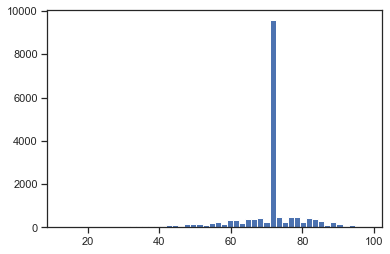

In [110]:
plt.hist(data['Critic_Score'], 50)
plt.show()

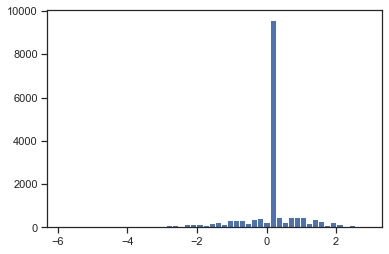

In [111]:
plt.hist(sc1_data, 50)
plt.show()

In [112]:
data.columns

Index(['Name', 'Platform', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count'],
      dtype='object')

In [113]:
data[['NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count']]=MinMaxScaler().fit_transform(data[['NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count']])

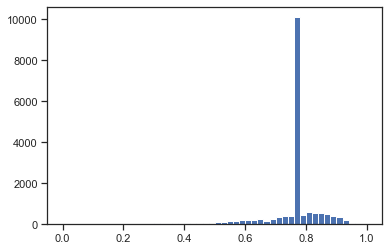

In [114]:
plt.hist(data['User_Score'], 50)
plt.show()

In [115]:
data.head(10)

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,10,Nintendo,1.000000,1.000000,0.368885,0.799432,1.000000,0.741176,0.436364,0.824742,0.029734
1,Super Mario Bros.,NES,4,Nintendo,0.703095,0.123619,0.666341,0.072848,0.487459,0.682353,0.163636,0.773196,0.001951
2,Mario Kart Wii,Wii,6,Nintendo,0.379110,0.441989,0.370841,0.311258,0.430874,0.811765,0.636364,0.855670,0.065787
3,Wii Sports Resort,Wii,10,Nintendo,0.377418,0.378108,0.320939,0.279092,0.397068,0.788235,0.636364,0.824742,0.017562
4,Pokemon Red/Pokemon Blue,G,7,Nintendo,0.272485,0.306975,1.000000,0.094607,0.379983,0.682353,0.163636,0.773196,0.001951
5,Tetris,G,5,Nintendo,0.560928,0.078039,0.412916,0.054872,0.366533,0.682353,0.163636,0.773196,0.001951
6,New Super Mario Bros.,DS,4,Nintendo,0.272727,0.315953,0.636008,0.272469,0.361081,0.894118,0.563636,0.876289,0.039862
7,Wii Play,Wii,3,Nintendo,0.337524,0.316989,0.286693,0.268685,0.350297,0.529412,0.345455,0.680412,0.011615
8,New Super Mario Bros. Wii,Wii,4,Nintendo,0.350097,0.239986,0.459883,0.212867,0.343754,0.870588,0.700000,0.865979,0.054915
9,Duck Hunt,NES,8,Nintendo,0.651112,0.021754,0.027397,0.044465,0.342906,0.682353,0.163636,0.773196,0.001951
